In [1]:
# Import necessary libraries
import pandas as pd  # data manipulation and analysis
import numpy as np  # numerical operation and array handlings
import matplotlib.pyplot as plt  # data visualipytzation
import seaborn as sns  # statistical data visualization
from scipy import stats  # statistical analysis

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [2]:
# Load data from CSV file
df = pd.read_csv("data/health_lifestyle_classification.csv")

In [3]:
# Display first few rows of the DataFrame to understand its structure and contents
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survey_code,100000.0,50000.500000,28867.657797,1.000000,25000.750000,50000.500000,75000.250000,100000.000000
age,100000.0,48.525990,17.886768,18.000000,33.000000,48.000000,64.000000,79.000000
height,100000.0,170.023707,9.982798,140.000000,163.306615,170.016778,176.728920,210.000000
weight,100000.0,70.064862,14.693667,40.000000,59.856938,69.924141,80.027418,139.250894
bmi,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_estimated,100000.0,24.493876,5.951069,9.988495,20.271405,24.156734,28.258696,59.234792
bmi_scaled,100000.0,73.481627,17.853206,29.965484,60.814215,72.470201,84.776088,177.704377
bmi_corrected,100000.0,24.494140,5.954184,9.893845,20.271059,24.151699,28.247648,59.142646
waist_size,100000.0,84.933043,12.040314,34.093185,76.795185,84.957139,93.018713,133.153631
blood_pressure,92331.0,119.980149,15.015503,59.128168,109.812060,119.951794,130.120621,184.439195


In [5]:
# Drop irrelevant columns
# I have decided to drop the columns that are not relevant to the analysis, 
# for example, "survey_code", "bmi_estimated", "bmi_scaled", "bmi_corrected", "screen_time", "device_usage"
# I don't particularly believe that screen time and device usage are useful for the analysis as they are not directly related to the health of the individual
df = df.drop(columns=["survey_code", "bmi_estimated", "bmi_scaled", "bmi_corrected", "screen_time", "device_usage"])

In [6]:
# Randomly select 5% sample of the dataset for exploratory analysis
df = df.sample(frac=0.05, random_state=42)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.471200,17.963410,18.000000,33.000000,48.000000,64.000000,79.000000
height,5000.0,169.757513,10.057178,140.000000,163.139476,169.792552,176.255373,202.325995
weight,5000.0,70.309590,14.747627,40.000000,59.991126,70.234156,80.170681,133.799980
bmi,5000.0,24.680636,6.080198,10.806374,20.341488,24.323523,28.542848,52.283294
waist_size,5000.0,84.691474,11.938526,43.595783,76.773272,84.777225,92.713265,125.472885
blood_pressure,4618.0,120.012060,15.142783,64.350210,109.693851,119.796306,130.390259,182.799505
heart_rate,4359.0,75.092129,9.858445,38.427230,68.678545,75.172967,81.745310,109.127499
cholesterol,5000.0,189.739847,29.636416,94.437156,169.625592,189.566724,209.247153,293.503395
glucose,5000.0,99.953725,19.905865,16.291354,86.516859,99.939242,113.355176,168.020793
insulin,4242.0,14.910239,5.019656,-2.762738,11.485938,14.863151,18.334921,31.074461


In [7]:
# Identify numerial and categorical columns
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print(f"numerical columns: {numerical_features}")
print("-" * 100)
print(f"categorical columns: {categorical_features}")

numerical columns: Index(['age', 'height', 'weight', 'bmi', 'waist_size', 'blood_pressure',
       'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours',
       'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake',
       'sugar_intake', 'water_intake', 'stress_level', 'mental_health_score',
       'income', 'meals_per_day', 'electrolyte_level', 'gene_marker_flag',
       'environmental_risk_score', 'daily_supplement_dosage'],
      dtype='object')
----------------------------------------------------------------------------------------------------
categorical columns: Index(['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level',
       'mental_health_support', 'education_level', 'job_type', 'occupation',
       'diet_type', 'exercise_type', 'healthcare_access', 'insurance',
       'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner',
       'target'],
      dtype='object')


In [8]:
# Check target column
df["target"].value_counts()

target
healthy     3399
diseased    1601
Name: count, dtype: int64

## Exploratary Data Analysis before the data cleaning

It’s not a perfectly balanced dataset, but it is still enough for most models.

/var/folders/h_/4ghgx3wx635bd3k0fy4w48cc0000gn/T/ipykernel_80104/2018934476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="bmi", data=df, palette="Set2")


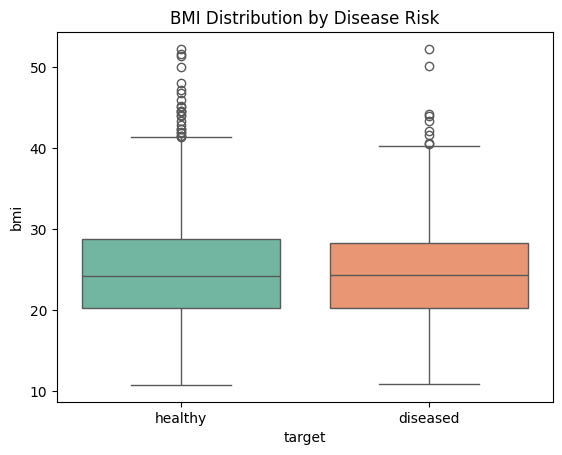

In [9]:
sns.boxplot(x="target", y="bmi", data=df, palette="Set2")
plt.title("BMI Distribution by Disease Risk")
plt.show()


Diseased individuals and healthy individuals both have similar BMI, using boxplot it shows that bmi is not a risk factor.

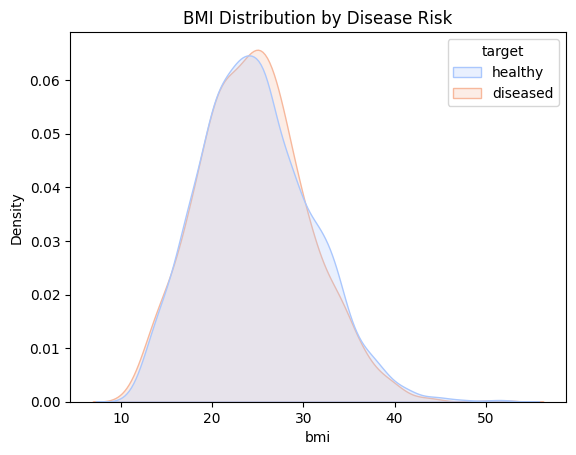

In [10]:
sns.kdeplot(data=df, x="bmi", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("BMI Distribution by Disease Risk")
plt.show()

Both groups’ BMI distributions overlap heavily.
However, the diseased group (blue) is slightly shifted to the right, indicating a tendency toward higher BMI values.

Healthy group peaks lower:
The healthy group peaks at a lower BMI (around ~21–23).
The diseased group peaks at a slightly higher BMI (around ~24–25).

Right tail difference:
At higher BMI levels (>30), the diseased group density is consistently slightly higher than the healthy group.
This suggests obesity/overweight is more prevalent among diseased individuals.

BMI is a moderate risk indicator:
The distributions are not dramatically separated, meaning BMI alone may not be a strong predictor.
But in combination with other features (e.g., blood pressure, cholesterol), BMI can still add predictive value for disease risk.

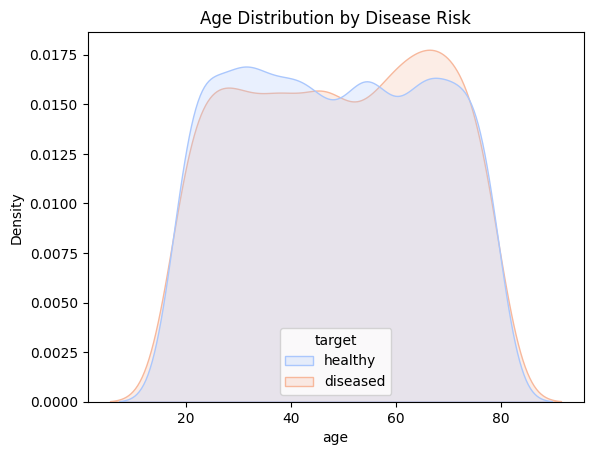

In [11]:
sns.kdeplot(data=df, x="age", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Age Distribution by Disease Risk")
plt.show()

Higher disease risk is associated with older age groups between 60 to 80 years old.

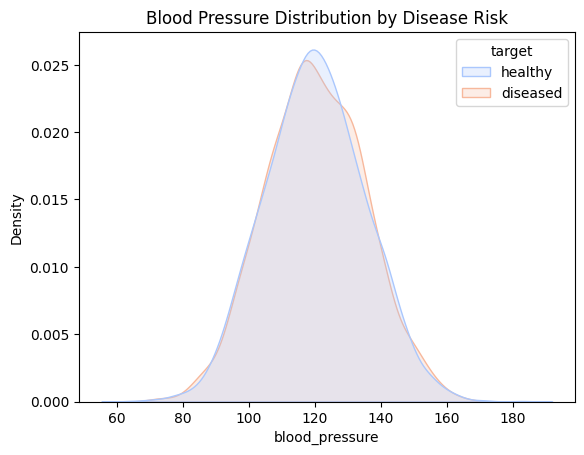

In [12]:
sns.kdeplot(data=df, x="blood_pressure", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Blood Pressure Distribution by Disease Risk")
plt.show()

Diseased group shows a distribution slightly skewed towards higher blood pressure values especially in the range between 135-145.

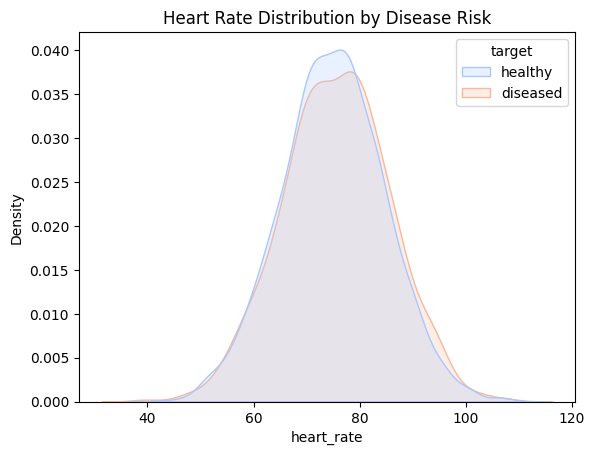

In [13]:
sns.kdeplot(data=df, x="heart_rate", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Heart Rate Distribution by Disease Risk")
plt.show()

Diseased group shows a distribution right-skewed towards higher heart rate especially in the range between 85-100.

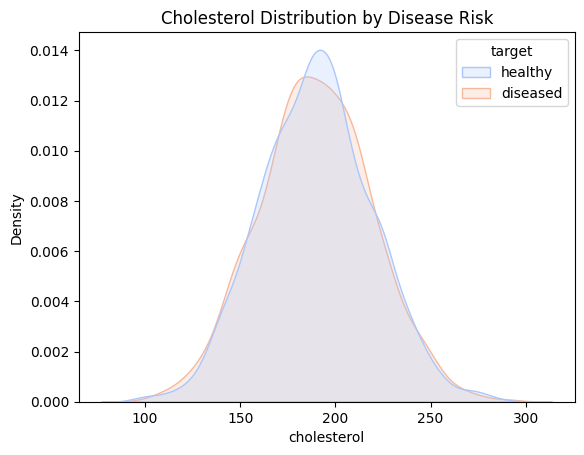

In [14]:
sns.kdeplot(data=df, x="cholesterol", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Cholesterol Distribution by Disease Risk")
plt.show()

Diseased group shows a slightly broader spread and higher density around 210-230.

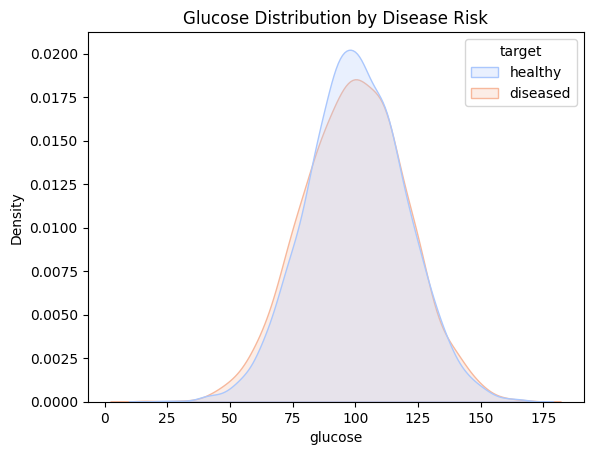

In [15]:
sns.kdeplot(data=df, x="glucose", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Glucose Distribution by Disease Risk")
plt.show()

Glucose levels for diseased individuals are shifted slightly rightward compared to healthy ones, meaning higher glucose is more common in the diseased group.

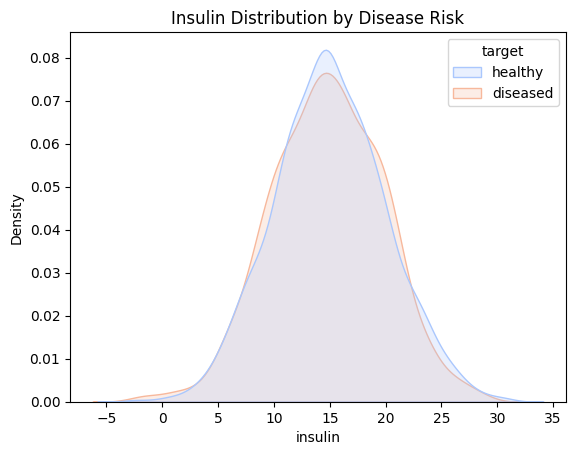

In [16]:
sns.kdeplot(data=df, x="insulin", hue="target", fill=True, common_norm=False, palette="coolwarm")
plt.title("Insulin Distribution by Disease Risk")
plt.show()

Diseased group shows a slightly wider spread and higher density in the 20–25 range. While not a strong standalone predictor, insulin may still contribute in combination with other features.

### Line Plot

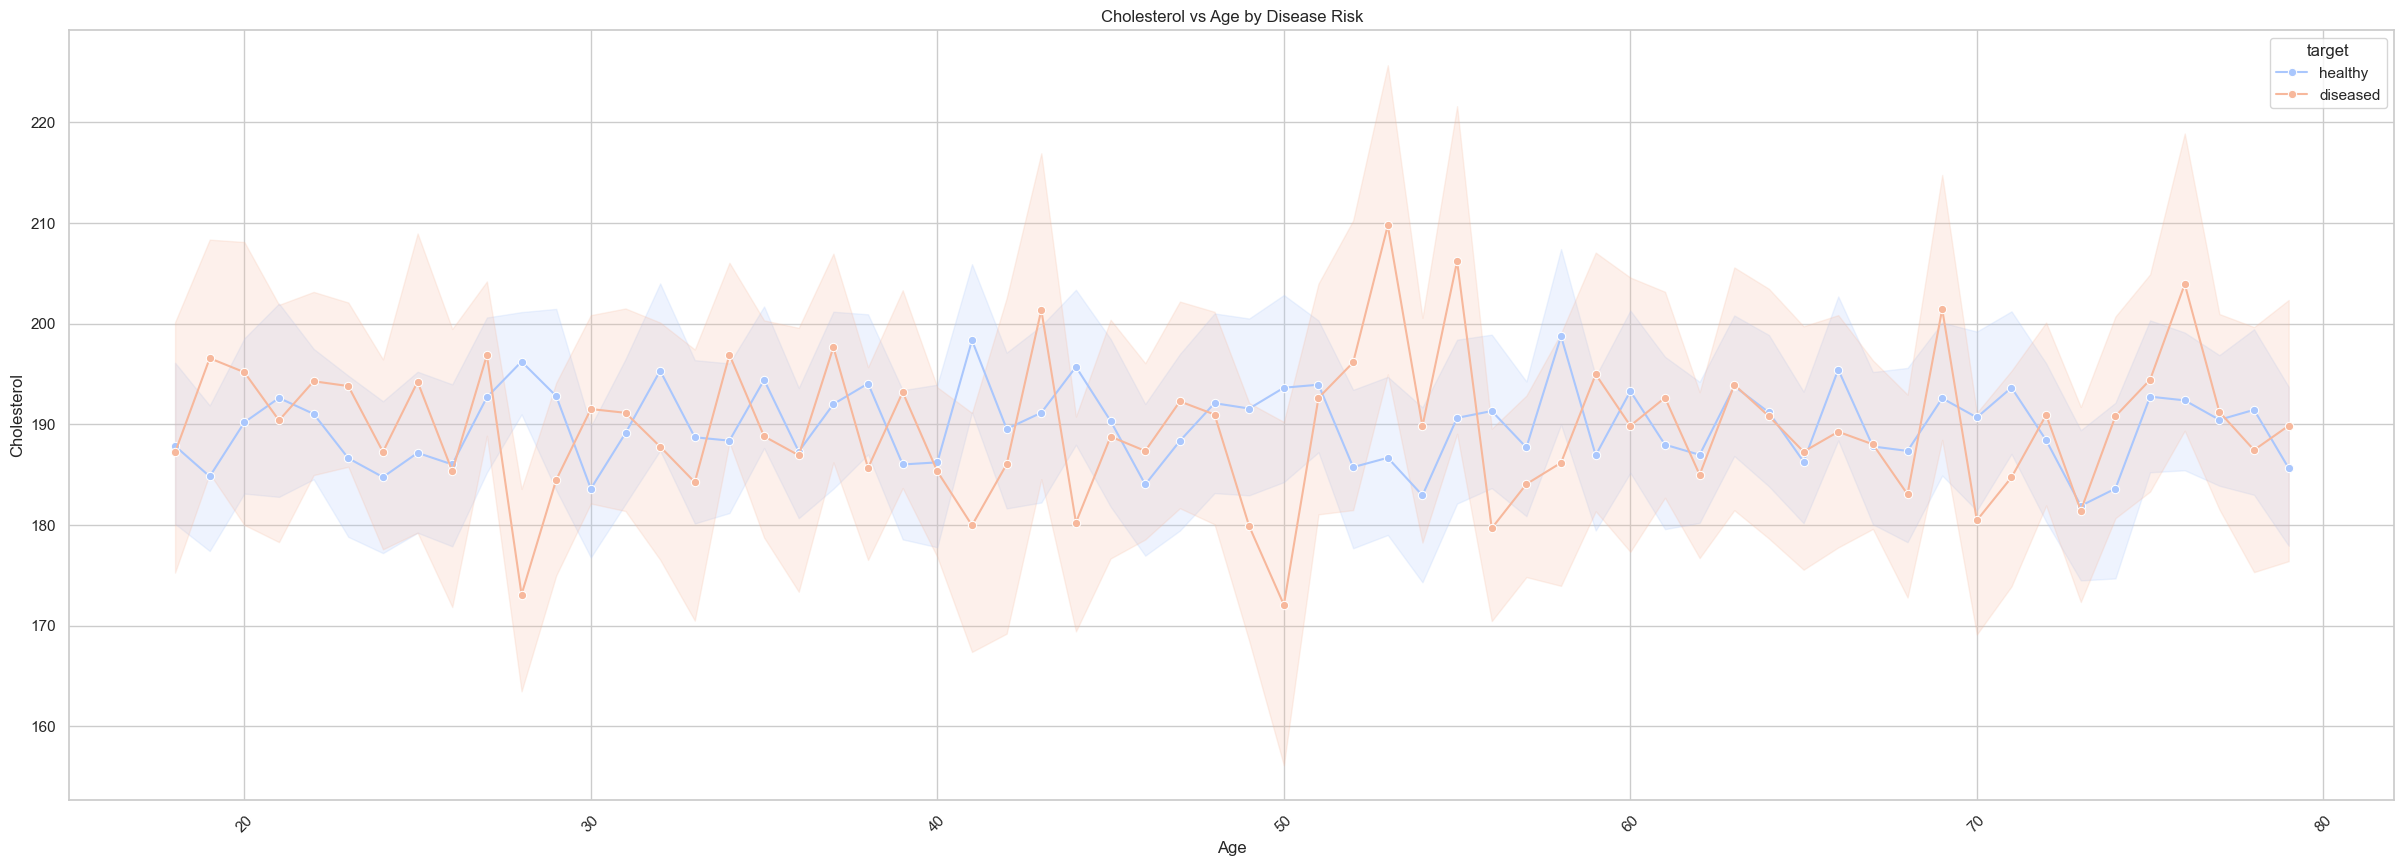

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(30,10))
sns.lineplot(x="age", y="cholesterol", hue="target", data=df, marker="o", palette="coolwarm")
plt.title("Cholesterol vs Age by Disease Risk")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.xticks(rotation=45)
plt.show()


Sudden spikes for both groups suggest outliers existed.

Healthy Group (Orange):

More stable cholesterol levels across ages
Smoother trajectory with less dramatic spikes
Stays mostly in the 180-220 mg/dL range

Diseased Group (Blue):

Significantly more volatile cholesterol patterns
Extreme spikes reaching 275+ mg/dL in several age groups
More frequent dramatic fluctuations

### Correlation Bar Plot

<Axes: >

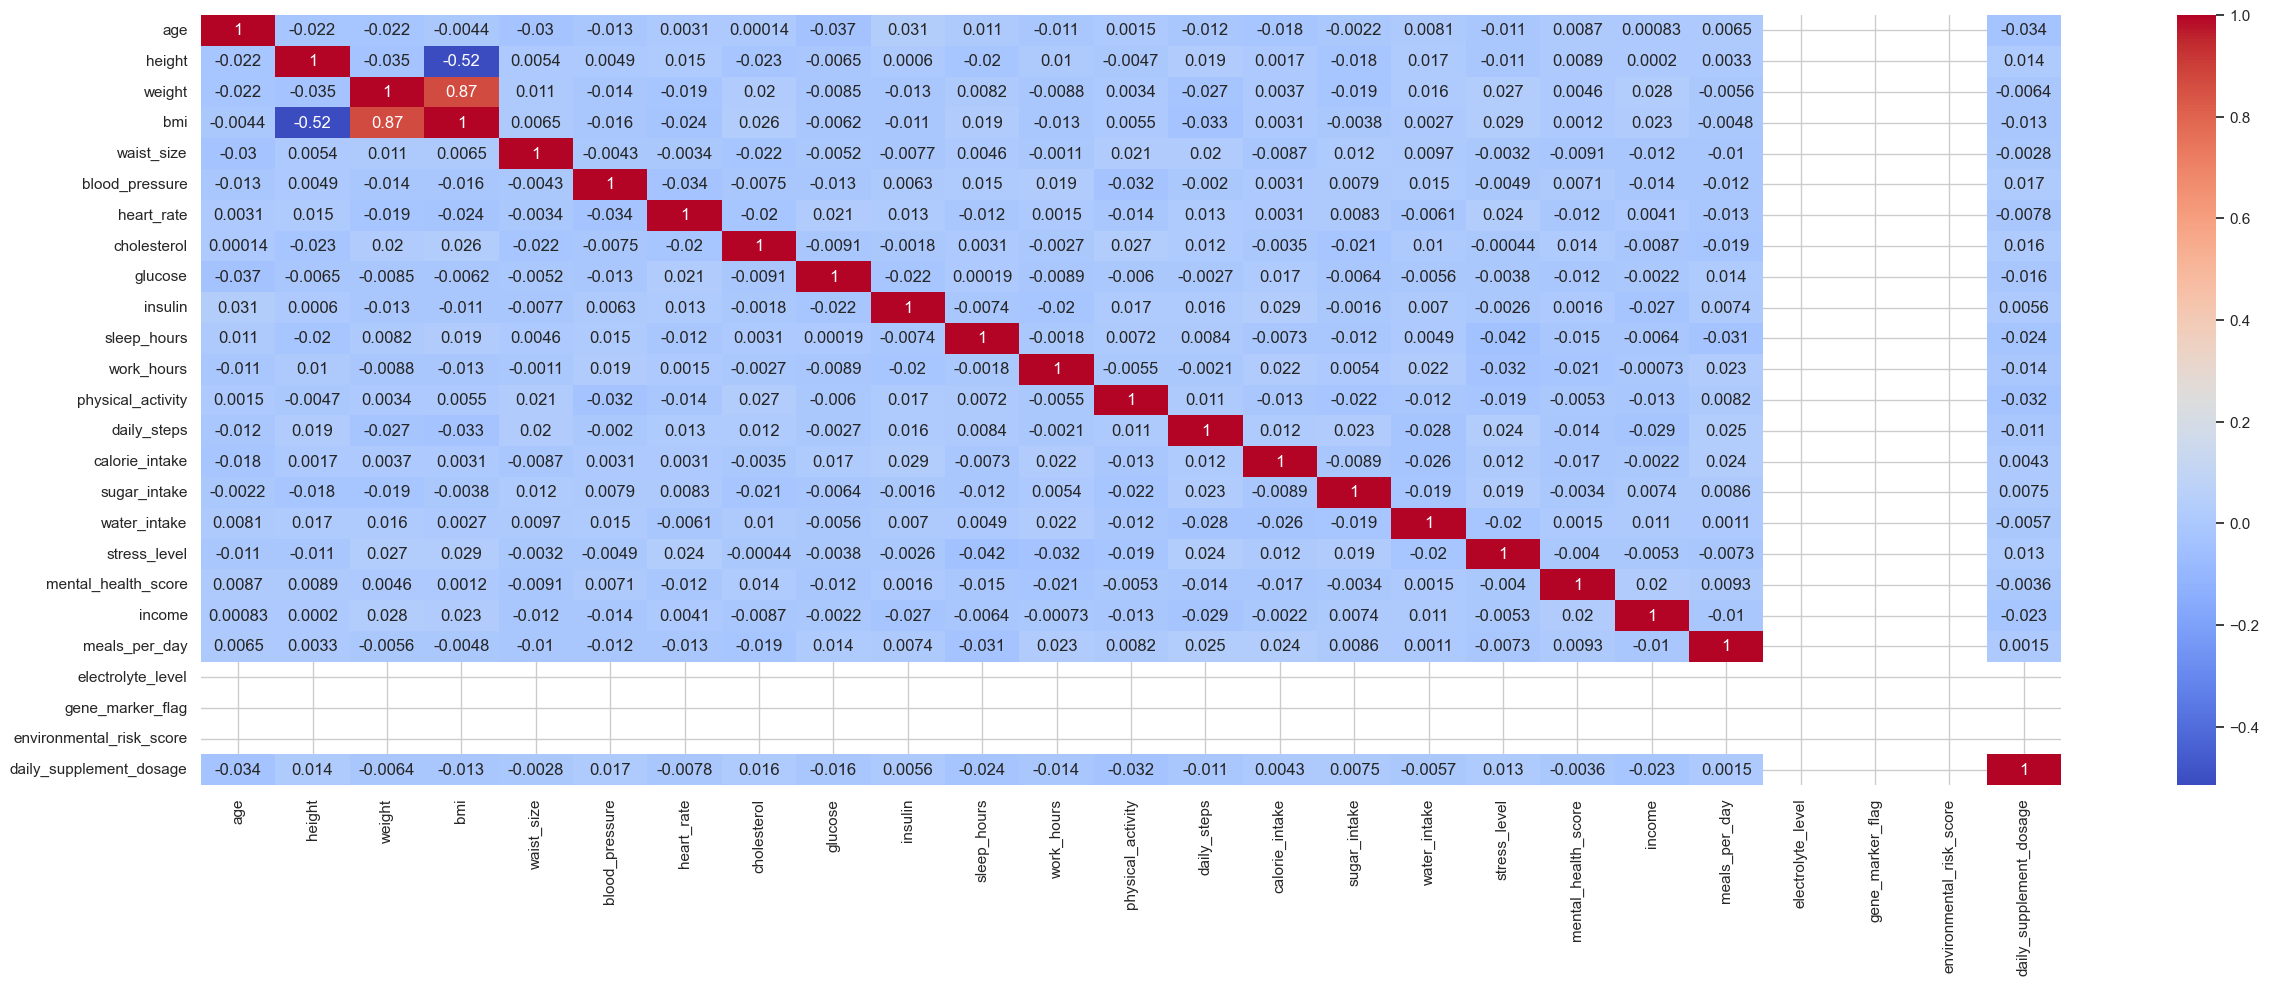

In [ ]:
# Heat map of Correlation
plt.figure(figsize=(30,10))

sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")


* Values close to 1 (dark red) mean strong positive correlation.
* Values close to -1 (dark blue) mean strong negative correlation.
* Values around 0 mean little to no correlation.
* The diagonal is always 1 because each variable is perfectly correlated with itself.

This helps identify relationships between health indicators (like BMI, blood pressure, cholesterol) and daily habits (like sleep hours, work hours, daily steps, diet, stress levels, etc).

### Pair Plot

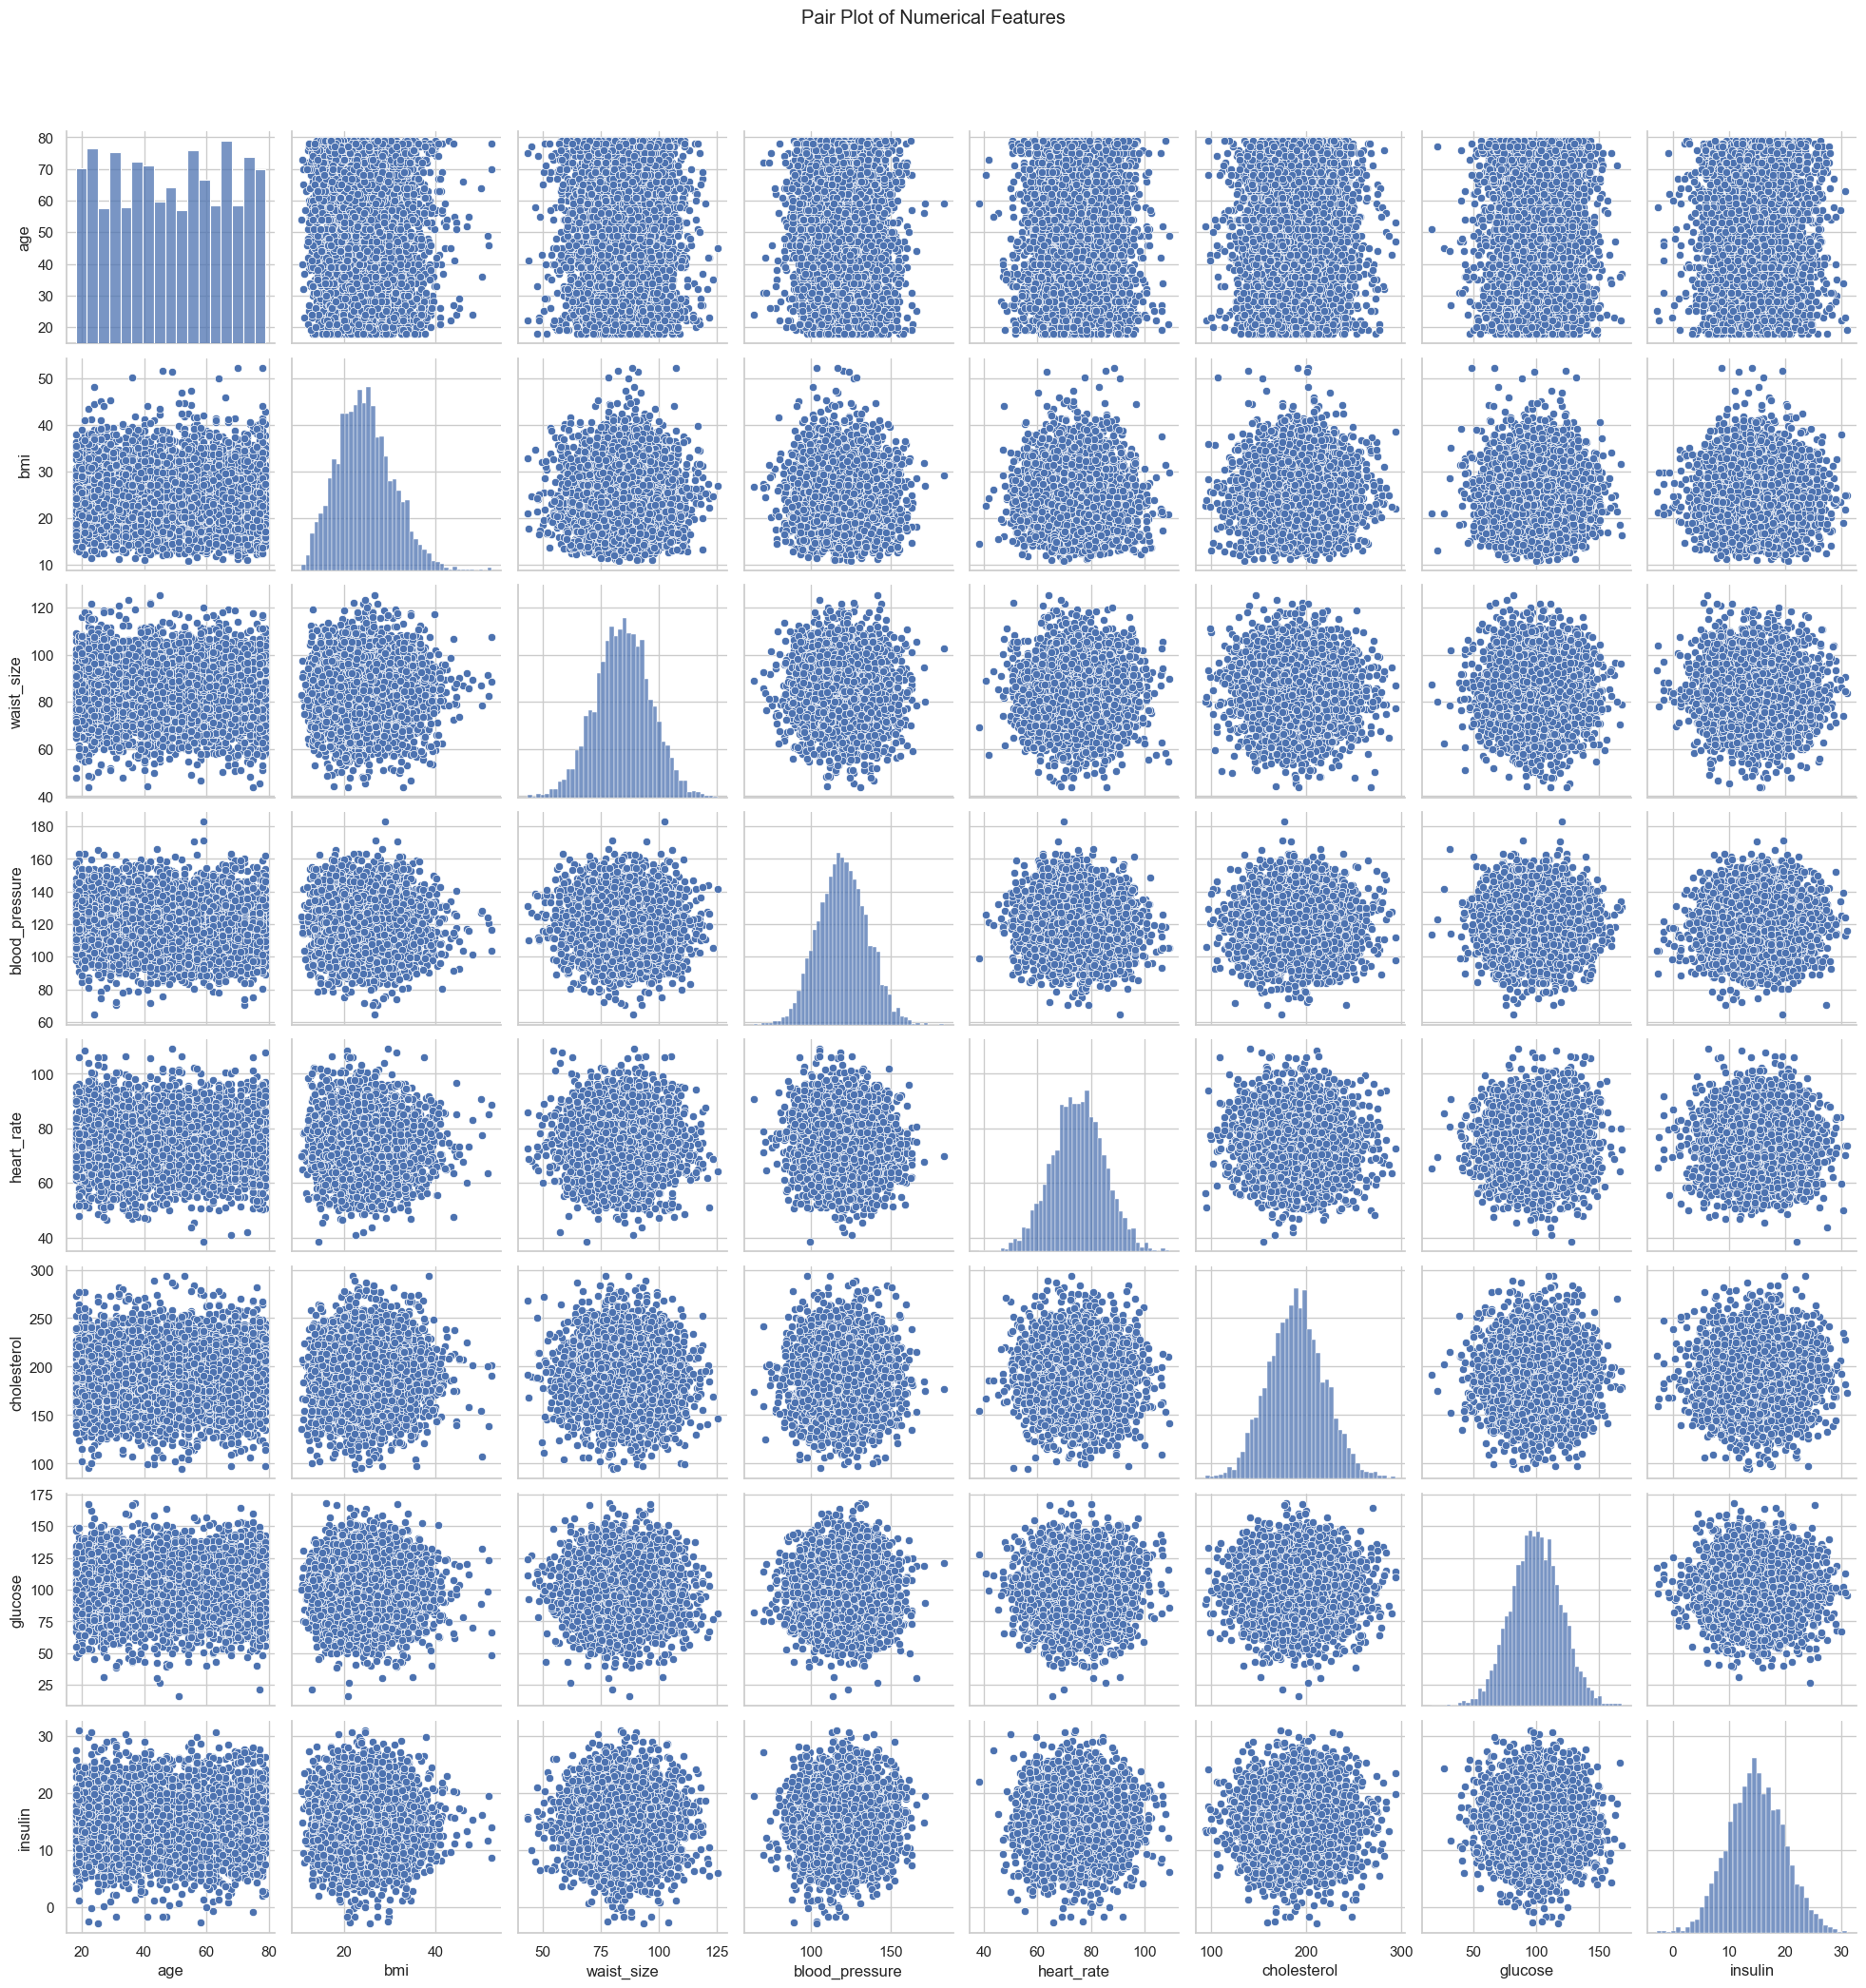

In [19]:
pair_plot = sns.pairplot(df[["age", "bmi", "waist_size", "blood_pressure", "heart_rate", "cholesterol", "glucose", "insulin"]])
pair_plot.fig.suptitle("Pair Plot of Numerical Features", y=1.05)
plt.show()

###### Normal Distributions:

Most variables show normal or near-normal distributions

Age appears evenly distributed across the study range

BMI shows typical population distribution

###### Right-Skewed Variables:

Glucose and Insulin show right skewness - common in metabolic data
Indicates some individuals with significantly elevated levels

###### Key Health Insights
1. Metabolic Health Integration:
The strongest correlations cluster around metabolic variables (glucose, insulin, waist size), suggesting these markers move together as a syndrome.
2. Age as Risk Multiplier:
Age shows consistent positive relationships with traditional risk factors (blood pressure, cholesterol), supporting cumulative risk models.
3. Physical Fitness Indicators:
Heart rate shows interesting patterns - likely representing resting heart rate as a fitness marker, with some inverse relationships to other health metrics.
4. Individual Variability:
The scatter plots show substantial individual variation even within correlated variables, emphasizing that population trends don't predict individual outcomes.

### Briefly discuss the question you could potentially explore with the dataset. Back up your reasons using the EDA you have performed with respect your target variable.

Based on the exploratory data analysis (EDA) performed, a key question to explore with this dataset is:

"Which health and lifestyle factors are most strongly associated with increased disease risk?"

Reasons backed by EDA:

1. The target variable distinguishes between diseased and healthy individuals.
2. EDA shows moderate separation in BMI and stronger separation in age, blood pressure, cholesterol, glucose, and insulin distributions between groups.
3. Correlation analysis highlights metabolic markers (glucose, insulin, waist size) and age as important risk factors.
4. Boxplots and KDE plots reveal that while BMI alone is not a strong predictor, combinations of features (e.g., age, cholesterol, blood pressure) show clearer differences.
5. Pair plots and heatmaps suggest that metabolic syndrome markers cluster together and may jointly influence disease risk.

### Recommendations for Further Analysis:

1. Statistical Testing:
   - Conduct t-tests for significant differences between groups
   - Perform chi-square tests for categorical variables
   - Consider survival analysis for age-related progression

2. Advanced Modeling:
   - Consider machine learning models for risk prediction
   - Investigate interaction effects between variables
   - Develop risk scoring system based on key indicators

3. Clinical Applications:
   - Focus on modifiable risk factors
   - Develop targeted intervention strategies
   - Consider age-specific risk assessments